In [2]:
from preprocessor import preprocess
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train, y_train, x_test, y_test, x_valid, y_valid = preprocess(args=['-i', 'imageOut.npz'], seed=12345)

In [4]:
# following first guide on https://www.tensorflow.org/tutorials/images/cnn
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train[0].shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(201))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), use_multiprocessing=True)

Train on 7577 samples, validate on 940 samples
Epoch 1/10
7577/7577 [==============================] - 99s 13ms/sample - loss: 9.9543 - accuracy: 0.0054 - val_loss: 5.2949 - val_accuracy: 0.0085
Epoch 2/10
7577/7577 [==============================] - 98s 13ms/sample - loss: 5.2634 - accuracy: 0.0148 - val_loss: 5.2767 - val_accuracy: 0.0085
Epoch 3/10
7577/7577 [==============================] - 107s 14ms/sample - loss: 5.1416 - accuracy: 0.0350 - val_loss: 5.3335 - val_accuracy: 0.0096
Epoch 4/10
7577/7577 [==============================] - 119s 16ms/sample - loss: 4.8969 - accuracy: 0.0744 - val_loss: 5.5792 - val_accuracy: 0.0128
Epoch 5/10
7577/7577 [==============================] - 115s 15ms/sample - loss: 4.5142 - accuracy: 0.1400 - val_loss: 6.1626 - val_accuracy: 0.0106
Epoch 6/10
7577/7577 [==============================] - 108s 14ms/sample - loss: 4.0956 - accuracy: 0.2143 - val_loss: 6.7455 - val_accuracy: 0.0149
Epoch 7/10
7577/7577 [==============================] - 85s 1

In [5]:
print(model.summary())

test_loss, test_acc = model.evaluate(x_valid, y_valid, verbose=2)
print('test accuracy: {:.2f}%'.format(test_acc * 100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

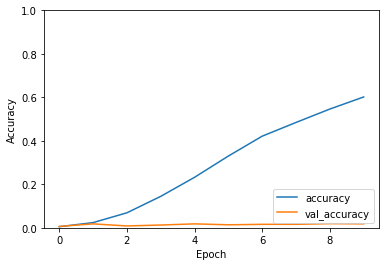

In [9]:
# graphing cell
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

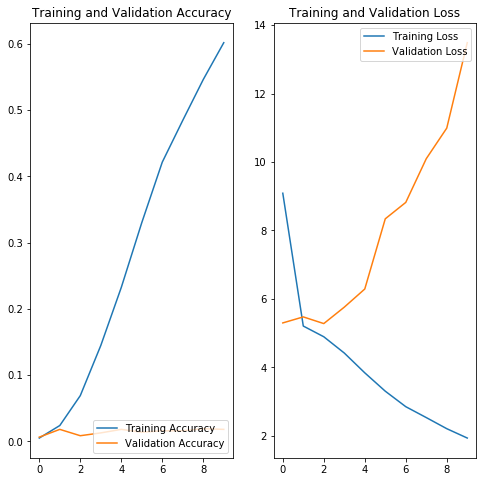

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

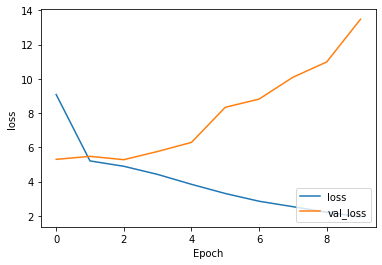

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
#plt.ylim([0.0, 1])
plt.legend(loc='lower right')